In [22]:
import pandas as pd

features_df = pd.read_csv('data_updated.csv')
food_index_df = pd.read_csv('food_index.csv')

merged_df = pd.merge(features_df, food_index_df, on=['Country Name', 'Country Code'], how='inner')

print(merged_df)


merged_df.to_csv('merged_data_final.csv', index=False)

     Country Name Country Code  \
0           Aruba          ABW   
1           Aruba          ABW   
2           Aruba          ABW   
3           Aruba          ABW   
4           Aruba          ABW   
..            ...          ...   
702  South Africa          ZAF   
703  South Africa          ZAF   
704  South Africa          ZAF   
705  South Africa          ZAF   
706  South Africa          ZAF   

                                      Indicator Name_x   Indicator Code_x  \
0    Annual freshwater withdrawals, total (% of int...     ER.H2O.FWTL.ZS   
1    Droughts, floods, extreme temperatures (% of p...     EN.CLC.MDAT.ZS   
2    CO2 emissions from gaseous fuel consumption (%...  EN.ATM.CO2E.GF.ZS   
3         Average precipitation in depth (mm per year)     AG.LND.PRCP.MM   
4    Agricultural irrigated land (% of total agricu...  AG.LND.IRIG.AG.ZS   
..                                                 ...                ...   
702  CO2 emissions from gaseous fuel consumption (%.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


merged_df = pd.read_csv('merged_data_final.csv')

merged_df = merged_df.fillna(69)



In [38]:
merged_df

,Country Name,Country Code,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y
0,Aruba,ABW,"Annual freshwater withdrawals, total (% of int...",ER.H2O.FWTL.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,96.848571,100.48,101.107143,98.408571,103.517143,107.172857,108.661429,112.394286,110.415714,69.0
1,Aruba,ABW,"Droughts, floods, extreme temperatures (% of p...",EN.CLC.MDAT.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,96.848571,100.48,101.107143,98.408571,103.517143,107.172857,108.661429,112.394286,110.415714,69.0
2,Aruba,ABW,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,96.848571,100.48,101.107143,98.408571,103.517143,107.172857,108.661429,112.394286,110.415714,69.0
3,Aruba,ABW,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,0.000000,254.273000,254.273000,254.273000,254.273000,254.273000,...,96.848571,100.48,101.107143,98.408571,103.517143,107.172857,108.661429,112.394286,110.415714,69.0
4,Aruba,ABW,Agricultural irrigated land (% of total agricu...,AG.LND.IRIG.AG.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,96.848571,100.48,101.107143,98.408571,103.517143,107.172857,108.661429,112.394286,110.415714,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,South Africa,ZAF,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,0.003676,0.003647,0.005761,0.007891,0.013017,0.039569,...,97.400000,102.95,100.990000,96.060000,105.850000,104.320000,104.540000,111.390000,114.310000,69.0
703,South Africa,ZAF,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,0.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,97.400000,102.95,100.990000,96.060000,105.850000,104.320000,104.540000,111.390000,114.310000,69.0
704,South Africa,ZAF,Agricultural irrigated land (% of total agricu...,AG.LND.IRIG.AG.ZS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,97.400000,102.95,100.990000,96.060000,105.850000,104.320000,104.540000,111.390000,114.310000,69.0
705,South Africa,ZAF,Arable land (% of land area),AG.LND.ARBL.ZS,0.000000,9.892090,9.933310,9.974530,10.015700,10.057000,...,97.400000,102.95,100.990000,96.060000,105.850000,104.320000,104.540000,111.390000,114.310000,69.0


In [114]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = merged_df[[f'{year}_x' for year in range(1960, 2021)]]
y = merged_df[[f'{year}_y' for year in range(1960, 2021)]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=3, min_samples_split=2, min_samples_leaf=1)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)


linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)


print(f'Linear Regression MSE: {linear_reg_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Decision Tree Regression MSE: {decision_tree_mse}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.958e+05, tolerance: 1.035e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.013e+05, tolerance: 1.045e

Linear Regression MSE: 29843.637211183923
Lasso Regression MSE: 17518.78982995083
Ridge Regression MSE: 29835.943548815732
Decision Tree Regression MSE: 888.6703175043635


In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate Linear Regression model
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

print(f'Linear Regression MSE: {linear_reg_mse}')
print(f'Linear Regression MAE: {linear_reg_mae}')
print(f'Linear Regression R-squared: {linear_reg_r2}')

# Evaluate Lasso Regression model
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Lasso Regression MAE: {lasso_mae}')
print(f'Lasso Regression R-squared: {lasso_r2}')

# Evaluate Ridge Regression model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Ridge Regression MAE: {ridge_mae}')
print(f'Ridge Regression R-squared: {ridge_r2}')

# Evaluate Decision Tree Regression model
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)

print(f'Decision Tree Regression MSE: {decision_tree_mse}')
print(f'Decision Tree Regression MAE: {decision_tree_mae}')
print(f'Decision Tree Regression R-squared: {decision_tree_r2}')

Linear Regression MSE: 29843.637211183923
Linear Regression MAE: 41.28855283105274
Linear Regression R-squared: -25.106299529739164
Lasso Regression MSE: 17518.78982995083
Lasso Regression MAE: 30.378841248115123
Lasso Regression R-squared: -13.201236142275272
Ridge Regression MSE: 29835.943548815732
Ridge Regression MAE: 41.28520028211218
Ridge Regression R-squared: -25.100558918030945
Decision Tree Regression MSE: 888.6703175043635
Decision Tree Regression MAE: 20.917238203220954
Decision Tree Regression R-squared: -0.03815742371109775


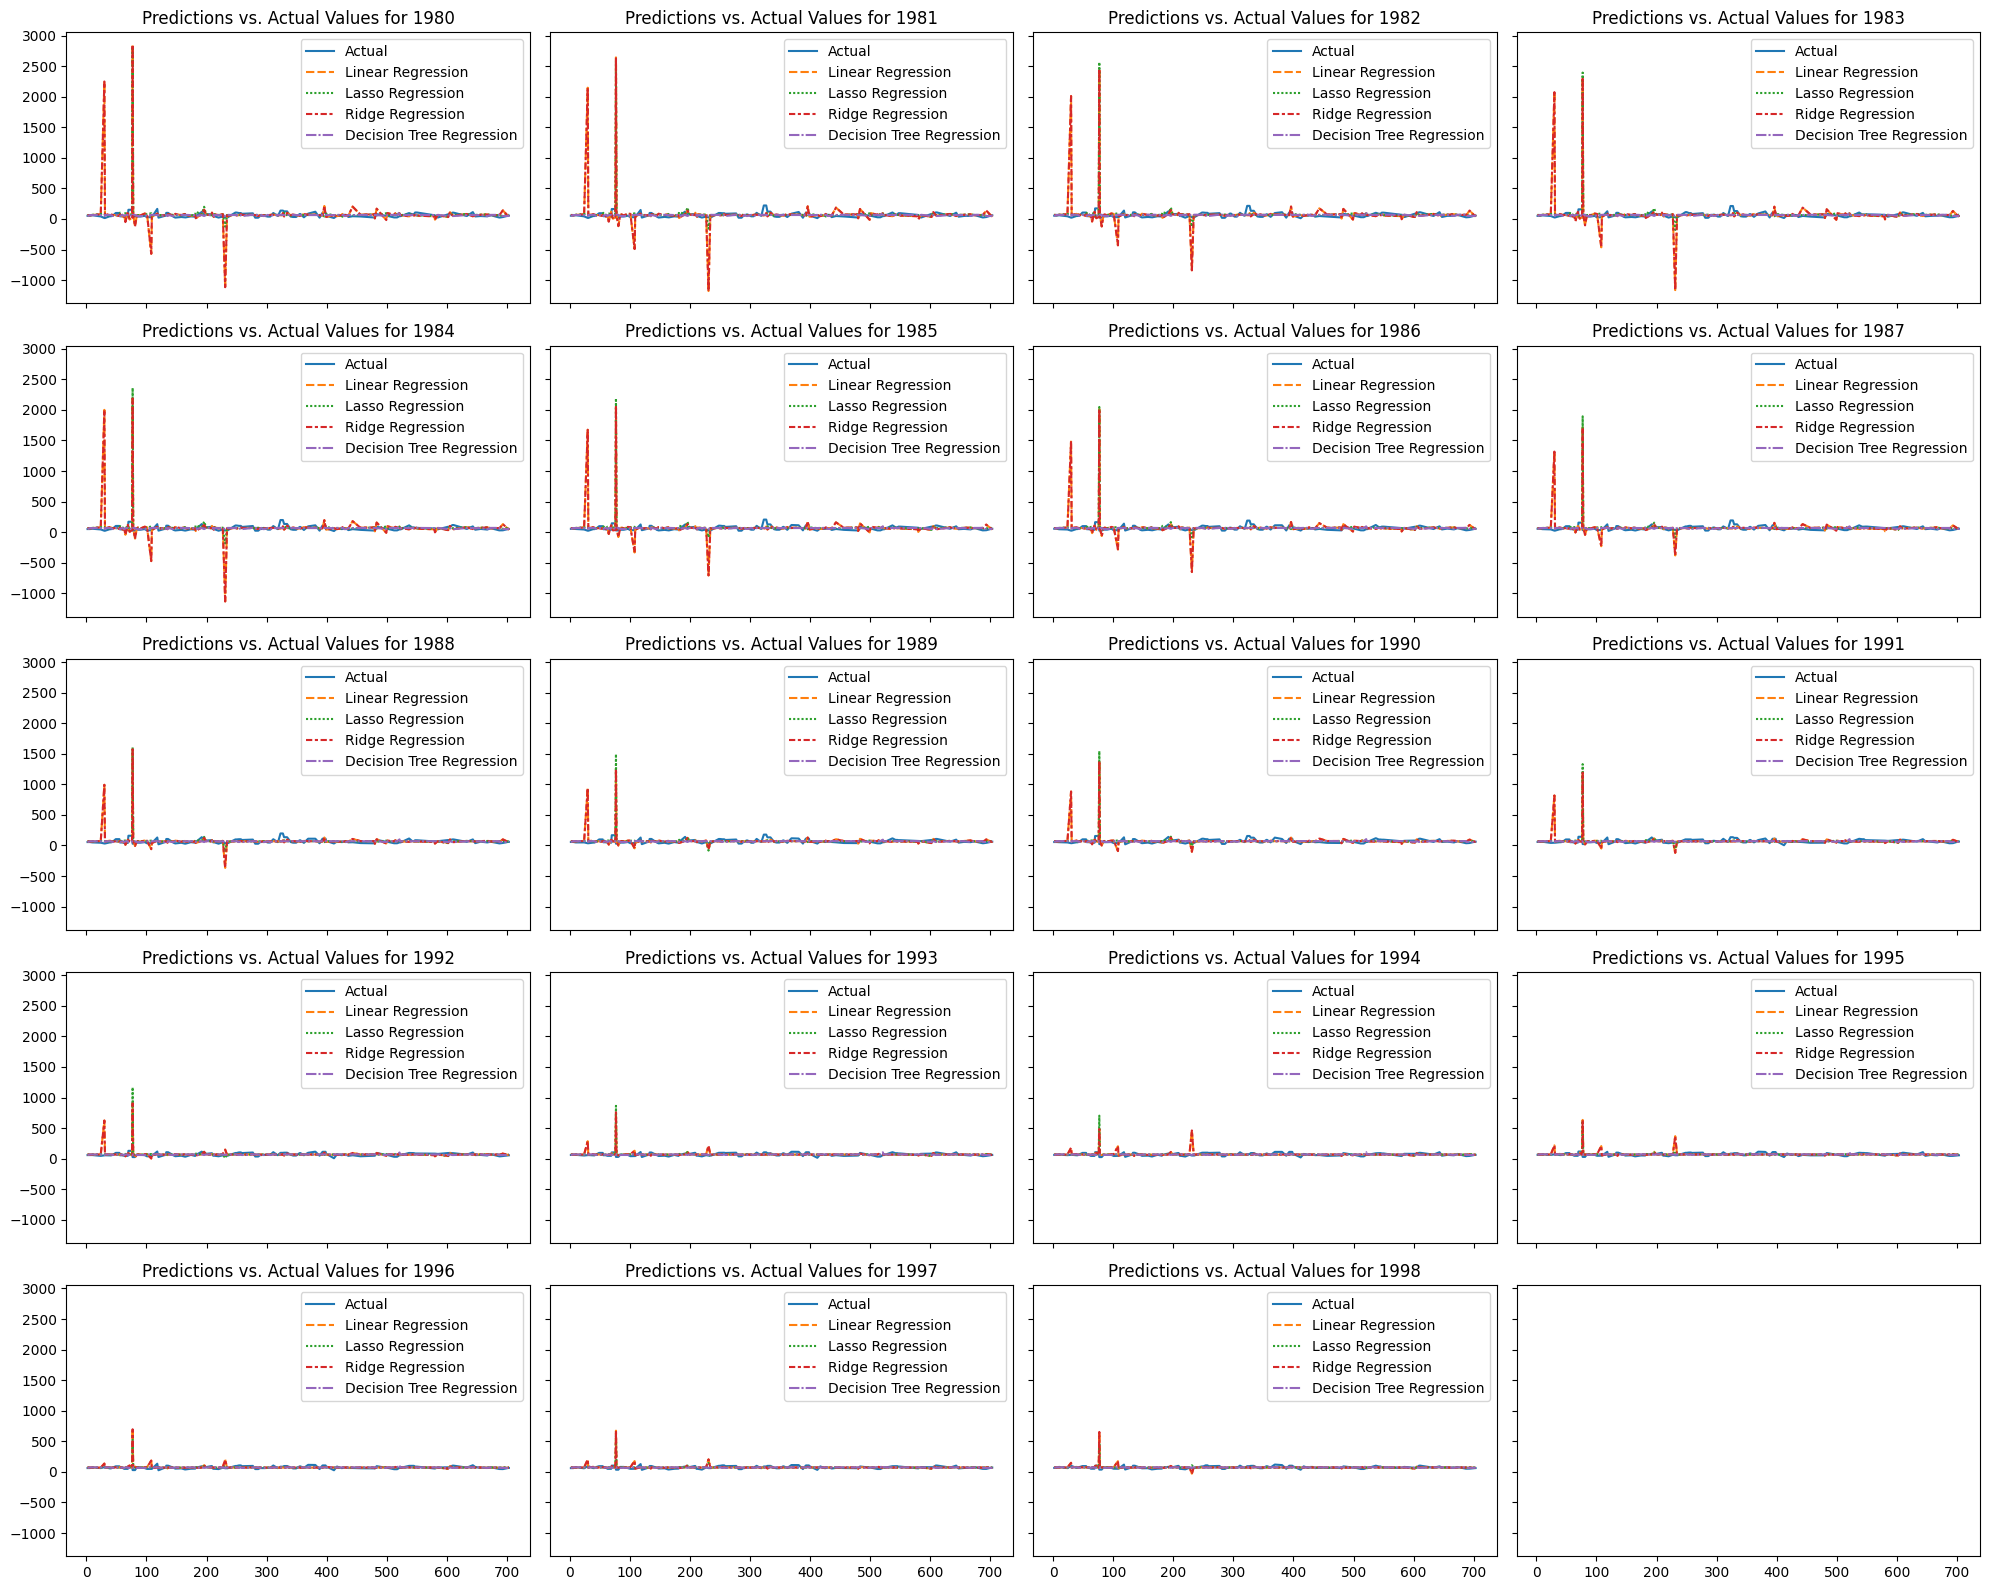

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns


years_to_visualize = range(1980, 1999)


fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 16), sharex=True, sharey=True)


axes = axes.flatten()

for i, year_to_visualize in enumerate(years_to_visualize):

    linear_reg_predictions_year = linear_reg_predictions[:, year_to_visualize - 1960]
    lasso_predictions_year = lasso_predictions[:, year_to_visualize - 1960]
    ridge_predictions_year = ridge_predictions[:, year_to_visualize - 1960]
    decision_tree_predictions_year = decision_tree_predictions[:, year_to_visualize - 1960]
    y_test_year = y_test[f'{year_to_visualize}_y']


    viz_df = pd.DataFrame({
        'Actual': y_test_year,
        'Linear Regression': linear_reg_predictions_year,
        'Lasso Regression': lasso_predictions_year,
        'Ridge Regression': ridge_predictions_year,
        'Decision Tree Regression': decision_tree_predictions_year
    })


    sns.lineplot(data=viz_df, ax=axes[i])
    axes[i].set_title(f'Predictions vs. Actual Values for {year_to_visualize}')


plt.tight_layout()
plt.show()

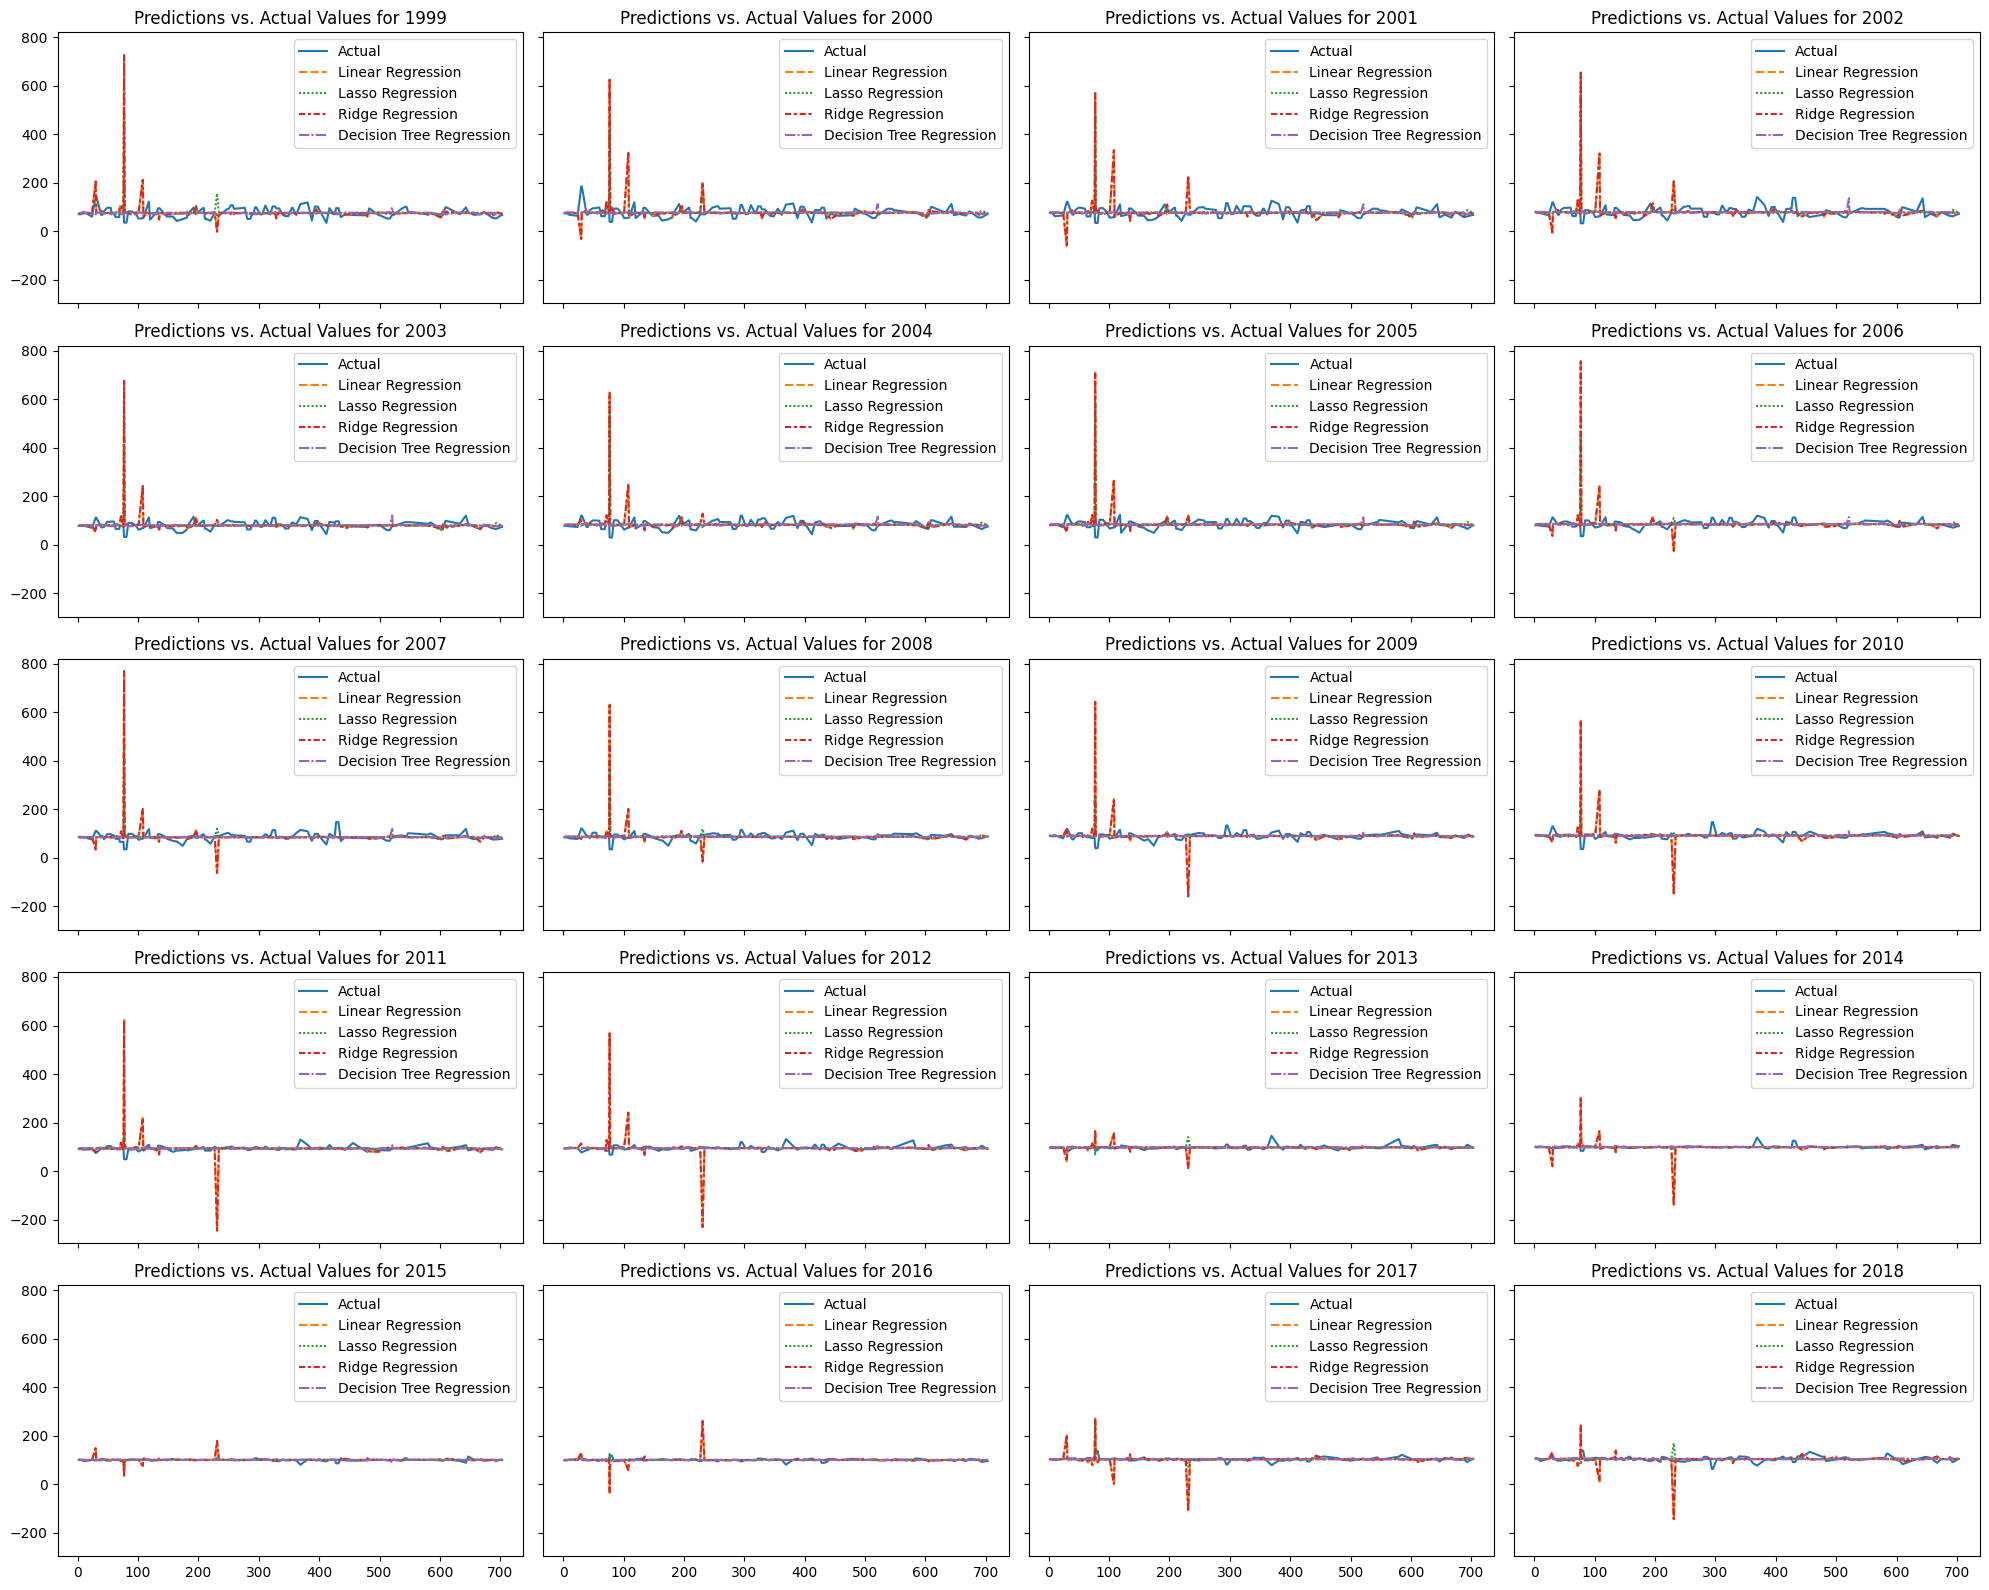

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

years_to_visualize = range(1999, 2019)  # Modify the range as needed


fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 16), sharex=True, sharey=True)


axes = axes.flatten()

for i, year_to_visualize in enumerate(years_to_visualize):

    linear_reg_predictions_year = linear_reg_predictions[:, year_to_visualize - 1960]
    lasso_predictions_year = lasso_predictions[:, year_to_visualize - 1960]
    ridge_predictions_year = ridge_predictions[:, year_to_visualize - 1960]
    decision_tree_predictions_year = decision_tree_predictions[:, year_to_visualize - 1960]
    y_test_year = y_test[f'{year_to_visualize}_y']


    viz_df = pd.DataFrame({
        'Actual': y_test_year,
        'Linear Regression': linear_reg_predictions_year,
        'Lasso Regression': lasso_predictions_year,
        'Ridge Regression': ridge_predictions_year,
        'Decision Tree Regression': decision_tree_predictions_year
    })


    sns.lineplot(data=viz_df, ax=axes[i])
    axes[i].set_title(f'Predictions vs. Actual Values for {year_to_visualize}')


plt.tight_layout()
plt.show()

<ipython-input-55-bba7b8149ea4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


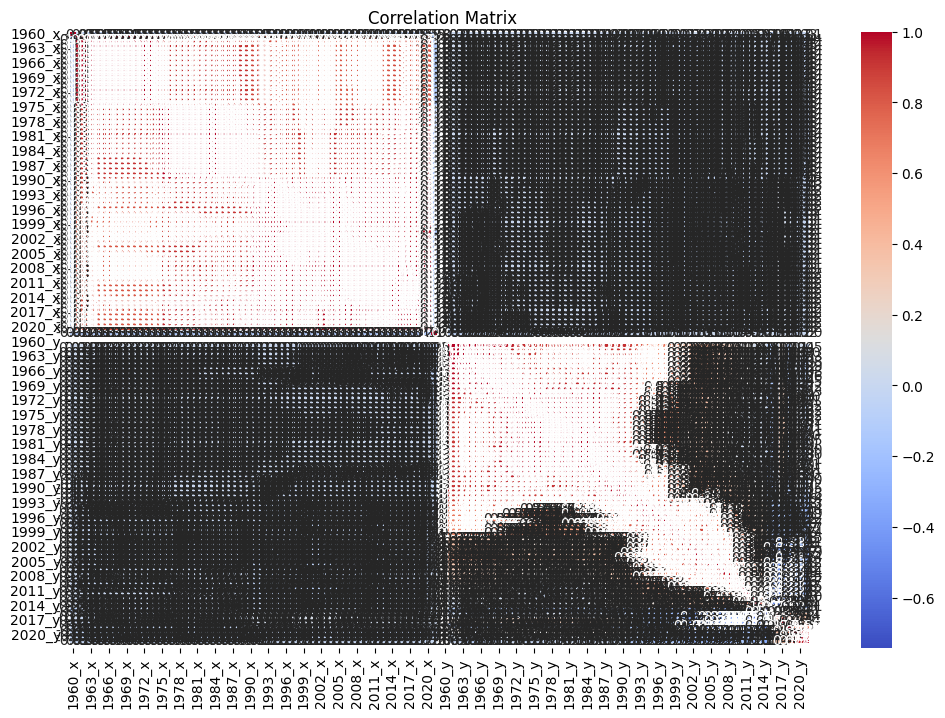

In [55]:
correlation_matrix = merged_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()